The code below fits the Voigt curve to the resonance valleys and finds the Q - factors.

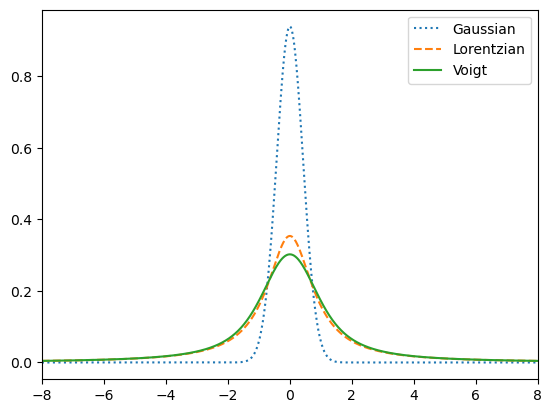

In [1]:
import numpy as np
from scipy.special import wofz
import pylab

def G(x, alpha, A, offset):
    return A*np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma, A, offset):
    return A*gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma, A, offset):
    sigma = alpha / np.sqrt(2 * np.log(2))
    return A*np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)

alpha, gamma, A, offset = 0.5,0.9,1,0
x = np.linspace(-8,8,1000)
pylab.plot(x, G(x, alpha, A, offset), ls=':', label='Gaussian')
pylab.plot(x, L(x, gamma, A, offset), ls='--', label='Lorentzian')
pylab.plot(x, V(x, alpha, gamma, A, offset), label='Voigt')
pylab.xlim(-8,8)
pylab.legend()
pylab.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
from lmfit import Model, Parameters
%matplotlib inline

def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    wavelength = data[:, 0]
    transmission = data[:, 1]
    return wavelength, transmission

def find_resonance_valleys(wavelength, transmission, distance=3):
    peaks, _ = find_peaks(transmission, distance=distance)
    global_max = max(transmission)
    threshold = global_max / 2
    filtered_peaks = [peak for peak in peaks if transmission[peak] >= threshold]
    return filtered_peaks

def voigt(x, x0, sigma, gamma, A, offset):
    return A * voigt_profile(x - x0, sigma, gamma) + offset

def fit_voigt_profile(wavelength, transmission, valleys, window_size=20):
    params = []
    voigt_model = Model(voigt)
    for valley in valleys:
        x0 = wavelength[valley]
        left = max(valley - window_size, 0)
        right = min(valley + window_size, len(wavelength) - 1)
        
        x_data = wavelength[left:right]
        y_data = 1-transmission[left:right]
        
        params_init = Parameters()
        params_init.add('x0', value=x0, vary = False)
        params_init.add('sigma', value=1e-14, min = 0)
        params_init.add('gamma', value=1e-11, min = 0)
        params_init.add('A', value=max(y_data))
        params_init.add('offset', value=min(y_data), min = 0)
        
        result = voigt_model.fit(y_data, x=x_data, params=params_init)
        params.append(result.best_values)
    
    return params

def calculate_q_factors(params):
    q_factors = []
    for p in params:
        lambda_0, sigma, gamma = p['x0'], p['sigma'], p['gamma']
        fwhm = 0.5346 * (2 * gamma) + np.sqrt(0.2166 * (2 * gamma)**2 + (2.3548 * sigma)**2)
        q_factor = lambda_0 / fwhm
        q_factors.append(q_factor)
    return q_factors

def main(file_path):
    wavelength, transmission = load_data(file_path)
    valleys = find_resonance_valleys(wavelength, 1-transmission)
    params = fit_voigt_profile(wavelength, transmission, valleys)
    q_factors = calculate_q_factors(params)
    
    for i, q in enumerate(q_factors):
        print(f"Valley {i + 1}: Q-factor = {q}")
        #print(params[i])
    
    plt.plot(wavelength, transmission, label='Original Data')
    for p in params:
        plt.plot(wavelength, 1-voigt(wavelength, **p), label=f'Voigt Fit (λ₀={(1e9*(p["x0"])):.2f} nm)')
    plt.plot(wavelength[valleys], transmission[valleys], 'ro', label='Valleys')
    plt.xlabel('Wavelength')
    plt.ylabel('Transmission')
    #plt.legend()
    plt.show()

50nm
Valley 1: Q-factor = 3537.3158188947805
Valley 2: Q-factor = 2105.215469482822
Valley 3: Q-factor = 1650.6891708095598
Valley 4: Q-factor = 1423.9833729447587


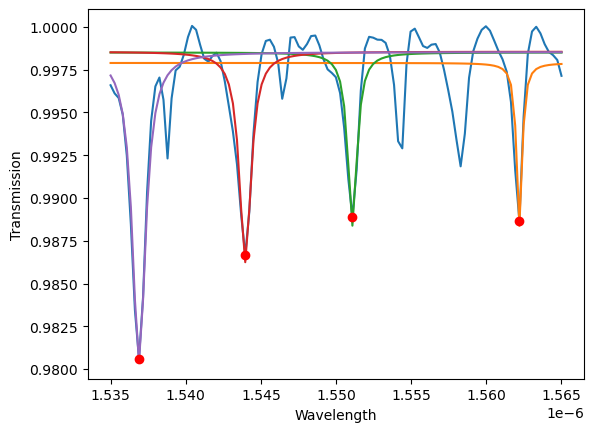

100nm
Valley 1: Q-factor = 2666.4925609996985
Valley 2: Q-factor = 2797.2800780752186
Valley 3: Q-factor = 2775.6109661283913
Valley 4: Q-factor = 2705.8757580528318


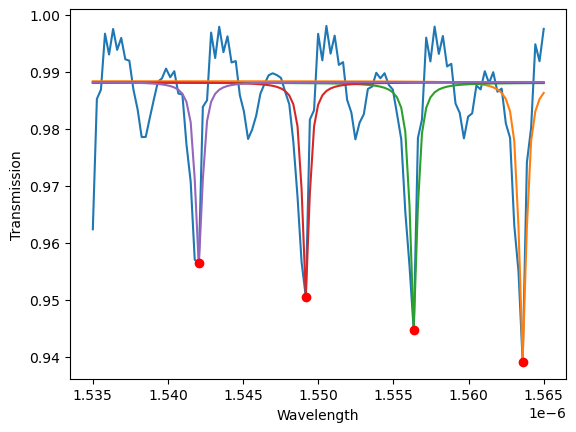

120nm
Valley 1: Q-factor = 3252.083003718897
Valley 2: Q-factor = 4165.499111227957
Valley 3: Q-factor = 3235.6740135321
Valley 4: Q-factor = 3364.432958242484
Valley 5: Q-factor = 2735.618518110252
Valley 6: Q-factor = 3135.0776510551477
Valley 7: Q-factor = 2101.4647017545653


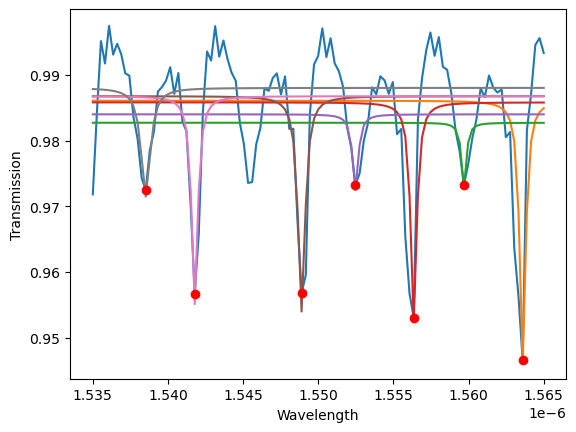

150nm
Valley 1: Q-factor = 2707.4315831589033
Valley 2: Q-factor = 2319.968610938871
Valley 3: Q-factor = 3372.221710829941
Valley 4: Q-factor = 2116.1827955339827
Valley 5: Q-factor = 4140.731508504527
Valley 6: Q-factor = 2081.7509541632294
Valley 7: Q-factor = 5470.93733521102
Valley 8: Q-factor = 1697.9005176995026


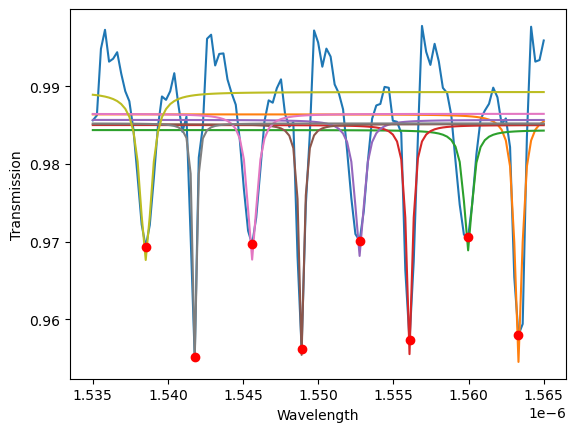

10 deg
Valley 1: Q-factor = 2666.4925609996985
Valley 2: Q-factor = 2797.2800780752186
Valley 3: Q-factor = 2775.6109661283913
Valley 4: Q-factor = 2705.8757580528318


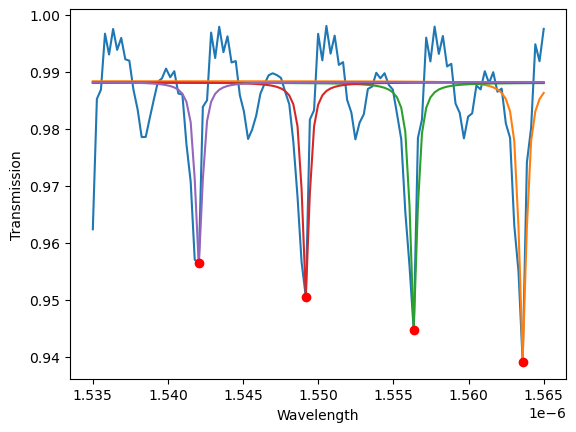

15 deg
Valley 1: Q-factor = 27612.479969746524
Valley 2: Q-factor = 31159.09826647148
Valley 3: Q-factor = 28540.43866816624
Valley 4: Q-factor = 6520.168987957852
Valley 5: Q-factor = 3851.545865012482
Valley 6: Q-factor = 2981.8133220979576
Valley 7: Q-factor = 2474.2042495761157
Valley 8: Q-factor = 2267.0388611496187
Valley 9: Q-factor = 2298.6981438932826
Valley 10: Q-factor = 2340.4118948802916
Valley 11: Q-factor = 2560.3051077572104
Valley 12: Q-factor = 2836.4358287546243
Valley 13: Q-factor = 3664.74615553534
Valley 14: Q-factor = 5732.207658943233
Valley 15: Q-factor = 32410.666954206165
Valley 16: Q-factor = 27155.084730231174
Valley 17: Q-factor = 31265.663577293613
Valley 18: Q-factor = 40597.56747086258
Valley 19: Q-factor = 41308.91935537832


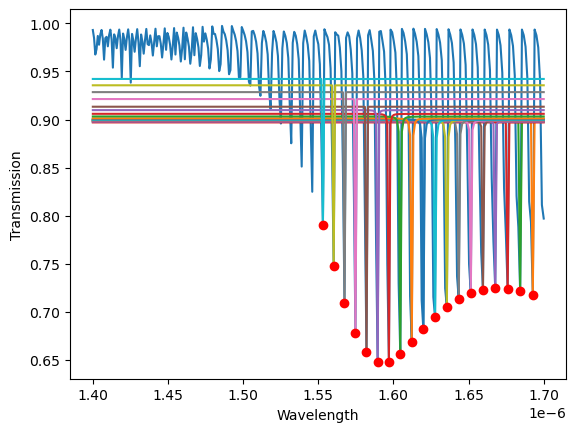

20 deg
Valley 1: Q-factor = 1422.3310974630717
Valley 2: Q-factor = 1556.3857379224319
Valley 3: Q-factor = 1611.5550694008207
Valley 4: Q-factor = 1666.0990139650278


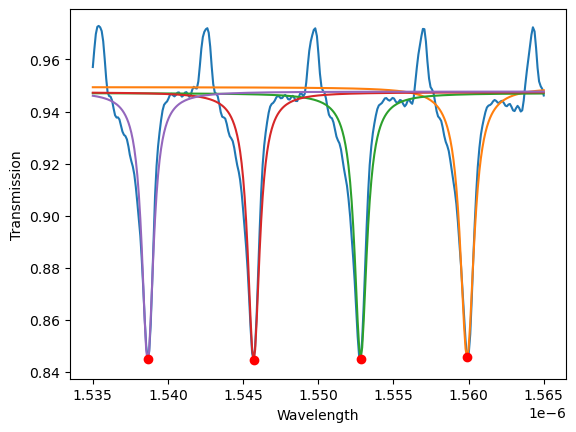

rad 40 um angle 20 deg T
Valley 1: Q-factor = 4004.7667901025893
Valley 2: Q-factor = 4344.007350534565
Valley 3: Q-factor = 4548.0838859676605
Valley 4: Q-factor = 4719.951056622257
Valley 5: Q-factor = 4987.730551587586


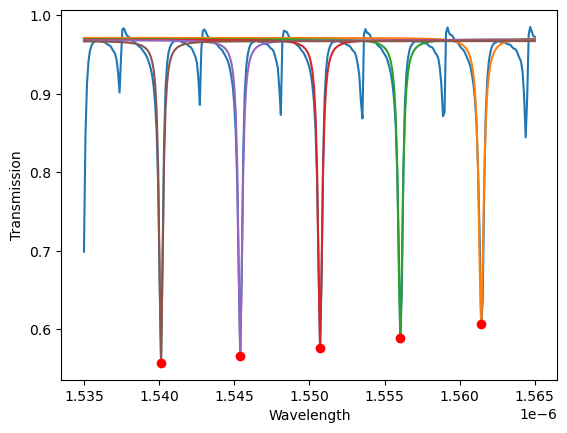

rad 40 um angle 15 deg T
Valley 1: Q-factor = 63950.78802280385
Valley 2: Q-factor = 91935.85241589342
Valley 3: Q-factor = 62581.45896208286
Valley 4: Q-factor = 60235.312038261094
Valley 5: Q-factor = 55628.49362996965
Valley 6: Q-factor = 56486.55939634186
Valley 7: Q-factor = 79788.94779271584
Valley 8: Q-factor = 57827.2927565006
Valley 9: Q-factor = 25619.791974953314
Valley 10: Q-factor = 2158.941258953782
Valley 11: Q-factor = 78100.72217637222
Valley 12: Q-factor = 38696.64658657711
Valley 13: Q-factor = 80419.67301398912


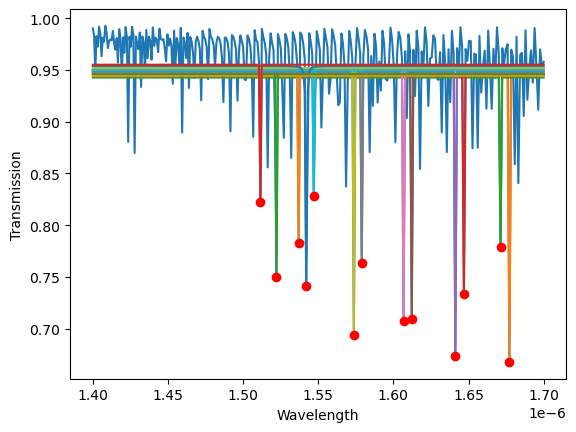

rad 50 um angle 20 deg T
Valley 1: Q-factor = 13153.933182170425
Valley 2: Q-factor = 11592.730096055957
Valley 3: Q-factor = 10336.334173313018
Valley 4: Q-factor = 8969.015918920983
Valley 5: Q-factor = 8355.31618434292
Valley 6: Q-factor = 9677.029365860457
Valley 7: Q-factor = 11807.885823430823


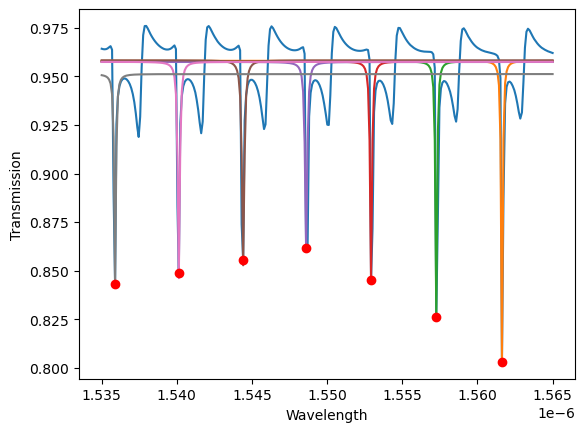

rad 60 um angle 15 deg T
Valley 1: Q-factor = 62085.70262884544
Valley 2: Q-factor = 62008.900287898934
Valley 3: Q-factor = 6814.140998037117
Valley 4: Q-factor = 76110.38239994083
Valley 5: Q-factor = 57878.37352820311
Valley 6: Q-factor = 7895.001151727937


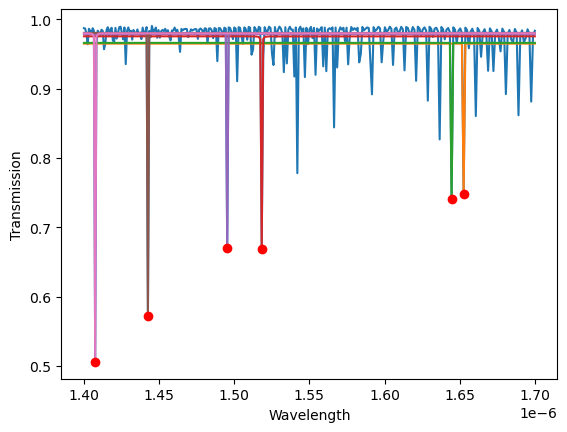

In [3]:
print("50nm")
main('gap 50nm T.txt')
print("100nm")
main('gap 100nm T.txt')
print("120nm")
main('gap 120nm T.txt')
print("150nm")
main('gap 150nm T.txt')

print("10 deg")
main('gap 100nm T.txt')
print("15 deg")
main('angle 15 deg T.txt')
print("20 deg")
main('angle 20 deg T.txt')

print("rad 40 um angle 20 deg T")
main('rad 40 um angle 20 deg T.txt')
print("rad 40 um angle 15 deg T")
main('rad 40 um angle 15 deg T.txt')
print("rad 50 um angle 20 deg T")
main('rad 50 um angle 20 deg T.txt')
print("rad 60 um angle 15 deg T")
main('rad 60 um angle 15 deg T.txt')